In [37]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

In [38]:
# constants ---------------------------------

# in this program we fixed the walk step l to be 1
taw = 1
min_existing_probability_to_lose = 0.37
lattice_size = 20

In [49]:
def calculate(starting_place: int, p: float):
    q = 1 - p
    t = 0
    
    # each element of this lattice is probability for that point in the real lattice to have the walker
    # in this time step
    lattice = np.zeros(lattice_size+1)

    # in t=0 walker is in the starting place
    lattice[starting_place] = 1
    
    while True:
        new_lattice = np.zeros(lattice_size+1)
        
        for i in range(lattice_size+1):
            # -1 and lattice_size+1 places are boundaries
            
            if i != lattice_size:
                new_lattice[i+1] += lattice[i]*p
            if i != 0:
                new_lattice[i-1] += lattice[i]*q
        
        # a copy of new_lattice not the real one
        lattice = new_lattice.copy()
        t += taw
        
        if lattice.sum() < min_existing_probability_to_lose:
            break
            
    return t

In [46]:
# helper function -----------------------------------

def get_the_inputs():
    '''get from input and return p, starting_places'''
    
    message = "please enter p: "
    p = float(input(message))
    
    message = f"please enter an array of starting places: \n(note that the lattice is from 0 to {lattice_size})\n\n"    
    # eval function evaluates input value as a python expression
    starting_places = eval(input(message))
    
    return p, starting_places

In [47]:
# starting the main program -------------------------

def start():
    p, starting_places = get_the_inputs()
    
    lifetimes = [calculate(starting_place, p) for starting_place in starting_places]
    
    plt.title(f"lattice is from 0 to {lattice_size}")
    plt.xlabel("starting place")
    plt.ylabel("lifetime")

    plt.plot(starting_places, lifetimes)
    
    return [starting_places, lifetimes]

please enter p:  0.5
please enter an array of starting places: 
(note that the lattice is from 0 to 20)

 np.linspace(0, 20, 21, dtype=int)


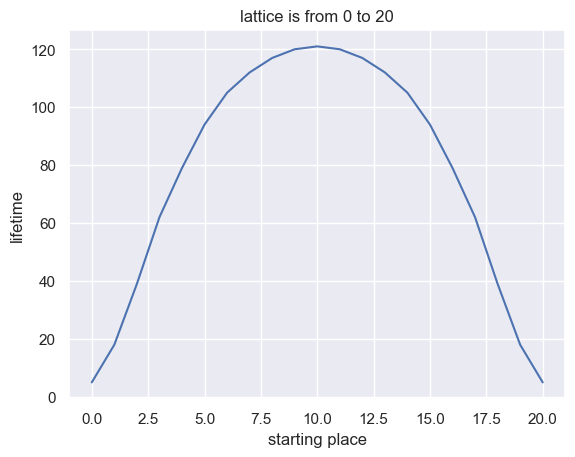

In [48]:
starting_places, lifetimes = start()

In [60]:
# loading data of simulated problem ------------------------

simulated_starting_places = np.loadtxt('simulated_starting_places.csv', delimiter=',')
simulated_lifetimes = np.loadtxt('simulated_lifetimes.csv', delimiter=',')

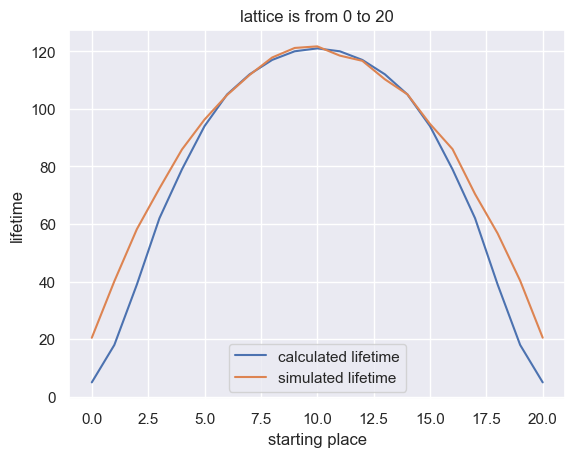

In [61]:
# comparing the results -------------------------------------

plt.title(f"lattice is from 0 to {lattice_size}")
plt.xlabel("starting place")
plt.ylabel("lifetime")

plt.plot(starting_places, lifetimes, label="calculated lifetime")
plt.plot(simulated_starting_places, simulated_lifetimes, label="simulated lifetime")

plt.legend();